In [122]:
from sympy import *
from dtumathtools import *
init_printing()
def inner(x1: Matrix,x2: Matrix):
    '''
    Computes the inner product of two vectors of same length.
    '''

    return x1.dot(x2, conjugate_convention = 'right')

MutableDenseMatrix.inner = inner
ImmutableDenseMatrix.inner = inner
x, y ,z ,n, u, v, θ, p = symbols('x,y,z,n,u,v,θ,\phi',real=true)

In [89]:
r_u = Matrix([[1], [0], [-0.5*sin(0.5*u)]])
r_v = Matrix([[0], [1], [0]])
product = r_u.cross(r_v)
product

⎡0.5⋅sin(0.5⋅u)⎤
⎢              ⎥
⎢      0       ⎥
⎢              ⎥
⎣      1       ⎦

In [90]:
r = Matrix([[u], [v], [cos(0.5 * u)]])
r_jacc = r.jacobian([u, v])
r_jacc

⎡       1         0⎤
⎢                  ⎥
⎢       0         1⎥
⎢                  ⎥
⎣-0.5⋅sin(0.5⋅u)  0⎦

In [91]:
r_jacc_alt = sqrt(det(r_jacc.T * r_jacc))
r_jacc_alt

In [92]:
andengrads_a = -0.26/(1.68**2/2**2)

In [93]:
r = Matrix([[u], [v], [andengrads_a*u**2 + 0.26]])
r_u = r.diff(u)
r_v = r.diff(v)
product = r_v.cross(r_u)
product

⎡-0.736961451247166⋅u⎤
⎢                    ⎥
⎢         0          ⎥
⎢                    ⎥
⎣         -1         ⎦

In [94]:
r_jacc = r.jacobian([u, v])
r_jacc

⎡         1            0⎤
⎢                       ⎥
⎢         0            1⎥
⎢                       ⎥
⎣-0.736961451247166⋅u  0⎦

In [95]:
r_jacc_alt = sqrt(det(r_jacc.T * r_jacc))
r_jacc_alt

In [96]:
V_s = Matrix([[-sin(θ)*cos(p)], [-sin(θ)*sin(p)], [-cos(θ)]])
inner = inner(V_s, product)
inner

In [97]:
in_func = inner*r_jacc_alt
display(in_func)

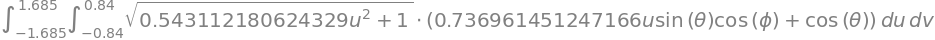

In [102]:
integral = Integral(in_func, (u, -1.68/2, 1.68/2),(v,-3.37/2,3.37/2))
display(integral, in_func)


In [108]:
integral = integrate(in_func, (u, -1.68/2, 1.68/2),(v,-3.37/2,3.37/2))
integral

# Effekt beregnelse

In [126]:
S0=1100
A= 0.5
S0A=S0*A
maxEffect = 250
maxEffectPrArea =  maxEffect/(0.98*1.8)
maxFlux=1000
EprF= maxEffectPrArea/maxFlux#effect per flux
expression = EprF*S0A *integral
display(expression)


In [123]:
import pandas as pd
import numpy as np
import pvlib
from pvlib.location import Location
import sympy as sm




In [124]:
tidszone = "Europe/Copenhagen"
start_dato = "2024-04-01"
slut_dato = "2024-12-31"
delta_tid = "H"  # "Min", "H",

valgt_dato = "2024-04-20"

# Definition of Location object. Coordinates and elevation of Amager, Copenhagen (Denmark)
site = Location(
    55.7873055556, 12.5270555556, tidszone, 10, "DTU (DK)"
)  # latitude, longitude, time_zone, altitude, name

# Definition of a time range of simulation
times = pd.date_range(
    start_dato + " 00:00:00", slut_dato + " 23:59:00", inclusive="left", freq=delta_tid, tz=tidszone
)
# Estimate Solar Position with the 'Location' object
solpos = site.get_solarposition(times)

## Energy production entire year (2024)

In [127]:
zenithAngs = np.deg2rad(np.array(solpos.loc[start_dato:slut_dato].apparent_zenith))
azimuthAngs = np.deg2rad(np.array(solpos.loc[start_dato:slut_dato].azimuth))

effectList = []

for i in range (len(zenithAngs)):
    effect = expression.subs({θ:zenithAngs[i],p:azimuthAngs[i]})
    if (effect>maxEffect):
        effectList.append(maxEffect)
    else:
        effectList.append(effect)

